Susnata's A/B Testing To Measure Drug Effectiveness

I will  conduct A/B testings using a two sample Z test.

>There is a drug A in the market that removes the headache in X number of hours.
>New drug B is being developed in this same pharma company and their hypothesis is that B can reduce the headache in less number of hours (i.e Recovery time for drug B is better compared to drug A).

I have conducted the clinical trail which is the patient and time taken over a period of months to treat headache and its averaged out (Let' say 5 times a patient had headache in 3 months the avg time is in recovery time hrs column)

and the results are available in the csv file which is a sample

It was a blindfold trial where even the participants did not know wether they got Placebo(Fake drug)  or real Drug


As per A/B test there is a contro group and a test group which form my two samples

In [1]:
#Importing necesssary packages

import pandas as pd
import numpy as np
from scipy import stats as st

In [2]:
from google.colab import files
uploaded = files.upload()

Saving control_group.csv to control_group.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving test_group.csv to test_group.csv


In [4]:
control = pd.read_csv("control_group.csv")
control.head()

,person_id,recovery_time_hrs
0,C001,4.4
1,C002,4.1
2,C003,3.2
3,C004,4.3
4,C005,4.9


In [5]:
test = pd.read_csv("test_group.csv")
test.head()

,person_id,recovery_time_hrs
0,T001,3.7
1,T002,4.1
2,T003,3.7
3,T004,3.9
4,T005,3.7


In [7]:
#Features of control group

control_mean = control.recovery_time_hrs.mean()
control_std = control.recovery_time_hrs.std()
control_size = control.shape[0]
control_mean, control_std, control_size

(np.float64(4.000769230769231), 0.4795825306420973, 130)

In [9]:
#Features of control group

test_mean = test.recovery_time_hrs.mean()
test_std = test.recovery_time_hrs.std()
test_size = test.shape[0]
test_mean, test_std, test_size



(np.float64(3.9119999999999995), 0.3156778821085274, 100)

### Hypothesis

1. Null Hypothesis (H0): No improvement in recovery time in the test group (mean_control <= mean_test)
1. Alternate Hypothesis (H1): Improvement in recovery time in the test group (mean_control > mean_test)

This is a right-tailed test since we are testing if the mean of the test group is significantly lower than the control group to prove efficacy

### Test Using Rejection Region  using Critical Z Value

In [10]:
a = (control_std**2/control_size)
b = (test_std**2/test_size)

Z_score = (control_mean-test_mean)/np.sqrt(a+b)
Z_score

np.float64(1.6879356404645995)

In this example, i am  comparing the effectiveness of two drugs (A and B) on headache recovery time:

Population mean (μ) → the true average recovery time for everyone (unknown).

Sample means (x̄₁, x̄₂) → the average recovery times from my control and test samples.

Sample sizes: n₁ = 130 (control), n₂ = 100 (test).

Population variances: σ₁² and σ₂².

If H0 then mu1 =mu2 then mu1-mu2 will be 0 and the formula simplifies to the below

As if null tru then no difference is old and new drug and mean is same

In [12]:
from IPython.display import Image, display

display(Image(url="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*X6c0HTrYfuAo7898TVVEyA.png"))

In [14]:
# For a significance level of 5% (0.05)alpha or with 95% confidence, in a right-tailed test, the critical Z-value is approximately 1.645 from below

alpha = 0.05 # significance level of 5%

critical_z_value = st.norm.ppf(1 - alpha)  # Right-tailed test at 5% significance level  using prob point function from
critical_z_value

np.float64(1.6448536269514722)

In [15]:
Z_score > critical_z_value

np.True_

As i can checvk from above , since the Z score is higher than the critical z value, it falls inside the rejection region. Hence we will reject our null hypothesis and accept the alternate hypothesis that the new drug indeed reduces the recovery time for the headache

### Test Using p-Value

In [19]:
# Calculating  the p-value corresponding to z score for a right-tailed test
p_value = 1 - st.norm.cdf(1.6879356404645995 )  #z score is approx 1.6879356404645995
p_value

np.float64(0.045711792064650814)

In [20]:
p_value < alpha # p value is less than significance level of 5% (or 0.05 for absolute value)

np.True_

As i can check , calculated p value is less than 5% significance level. Hence we will reject our null hypothesis and accept that alternate hypothesis that the new drug indeed reduces the recovery time for the headache

Since p value is low null is rejected

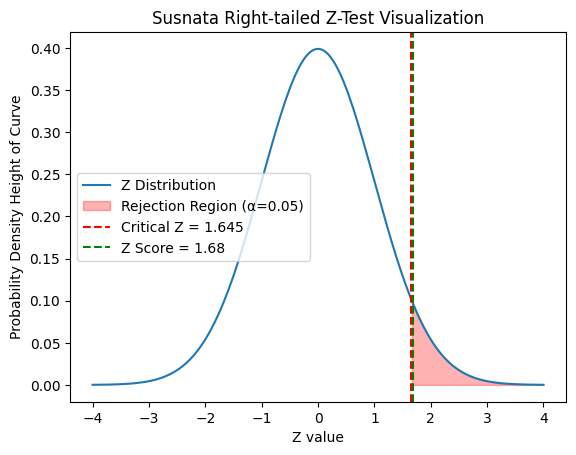

In [24]:
#Visualizing the result

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

x = np.linspace(-4, 4, 200)
y = norm.pdf(x)

plt.plot(x, y, label='Z Distribution')
plt.fill_between(x, y, where=(x > 1.645), color='red', alpha=0.3, label='Rejection Region (α=0.05)')
plt.axvline(1.645, color='red', linestyle='--', label='Critical Z = 1.645')
plt.axvline(Z_score, color='green', linestyle='--', label=f'Z Score = {Z_score:.2f}')
plt.legend()
plt.title('Susnata Right-tailed Z-Test Visualization')
plt.xlabel('Z value')
plt.ylabel('Probability Density Height of Curve')
plt.show()